In [2]:
import pandas as pd

# Đọc tập tin CSV gốc
df = pd.read_csv('Final_Car_used_data.csv')

# Lấy ngẫu nhiên 1000 hàng dữ liệu
small_df = df.sample(n=1000, random_state=42)

# Lưu vào tập tin "small_dataset.csv"
small_df.to_csv('small_dataset.csv', index=False)

In [1]:
import csv

# Dữ liệu mô tả trong ma trận
data = [
    ['RandomForestRegressor', None, None, None],
    ['DecisionTreeRegressor', None, None, None],
    ['XGBRegressor', None, None, None],
    ['GradientBoostingRegressor', None, None, None],
    ['BaggingRegressor', None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score', 'Cross_Validation_Score', 'Diff']

# Tạo và ghi vào file CSV
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

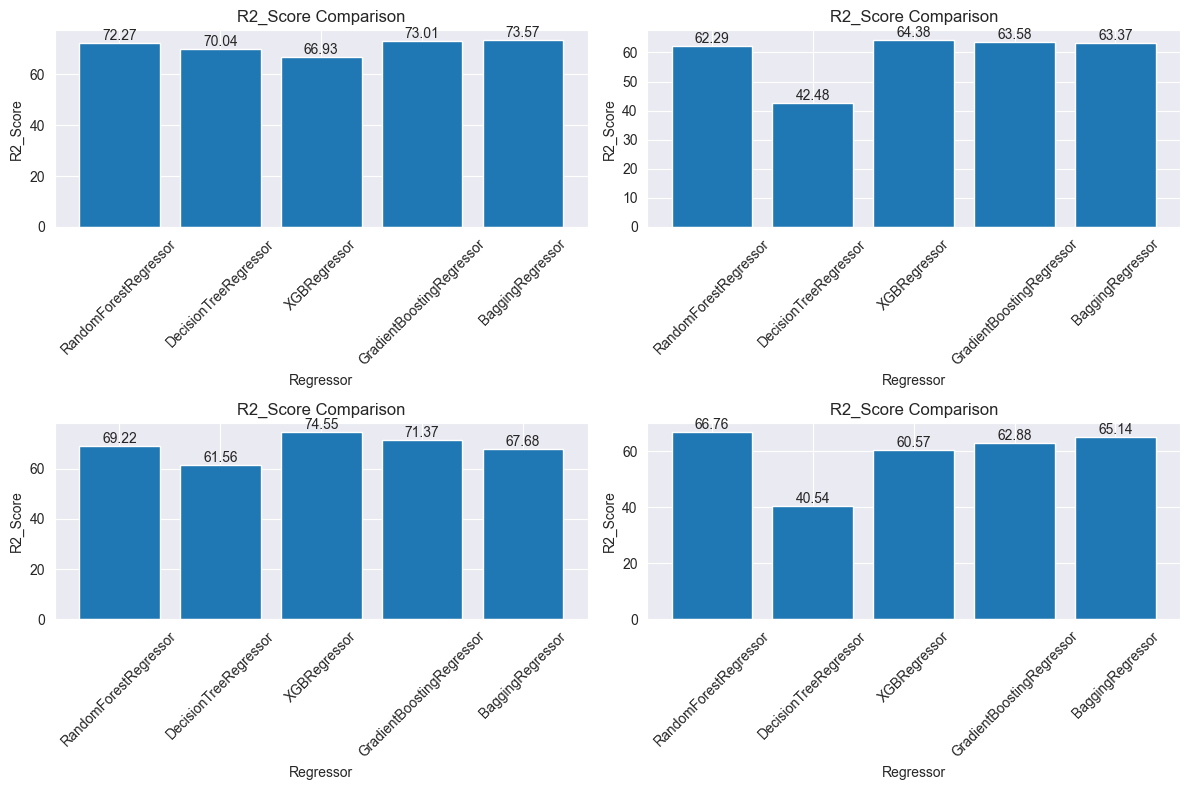

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến 4 file CSV
file_paths = ['scaled_small_car_used_data_ftloc_with_outliers_result.csv',
              'scaled_small_car_used_data_ftloc_without_outliers_result.csv',
              'scaled_small_car_used_data_with_outliers_result.csv',
              'scaled_small_car_used_data_without_outliers_result.csv']

# Tạo một figure và các axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Lặp qua từng file CSV và vẽ biểu đồ cho R2_Score
for i, ax in enumerate(axes.flat):
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(file_paths[i])

    # Lấy dữ liệu cột "R2_Score"
    r2_scores = data['R2_Score']

    # Lấy dữ liệu tương ứng của các regressor
    regressors = data['Regressor']

    # Vẽ biểu đồ
    bars = ax.bar(regressors, r2_scores)
    ax.set_xlabel('Regressor')
    ax.set_ylabel('R2_Score')
    ax.set_title(f'R2_Score Comparison')
    ax.tick_params(axis='x', rotation=45)

    # Hiển thị số trên mỗi cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

# Cân chỉnh layout của subplots
plt.tight_layout()

plt.savefig('r2_score_comparison_smallDS.png')
# Hiển thị biểu đồ
plt.show()


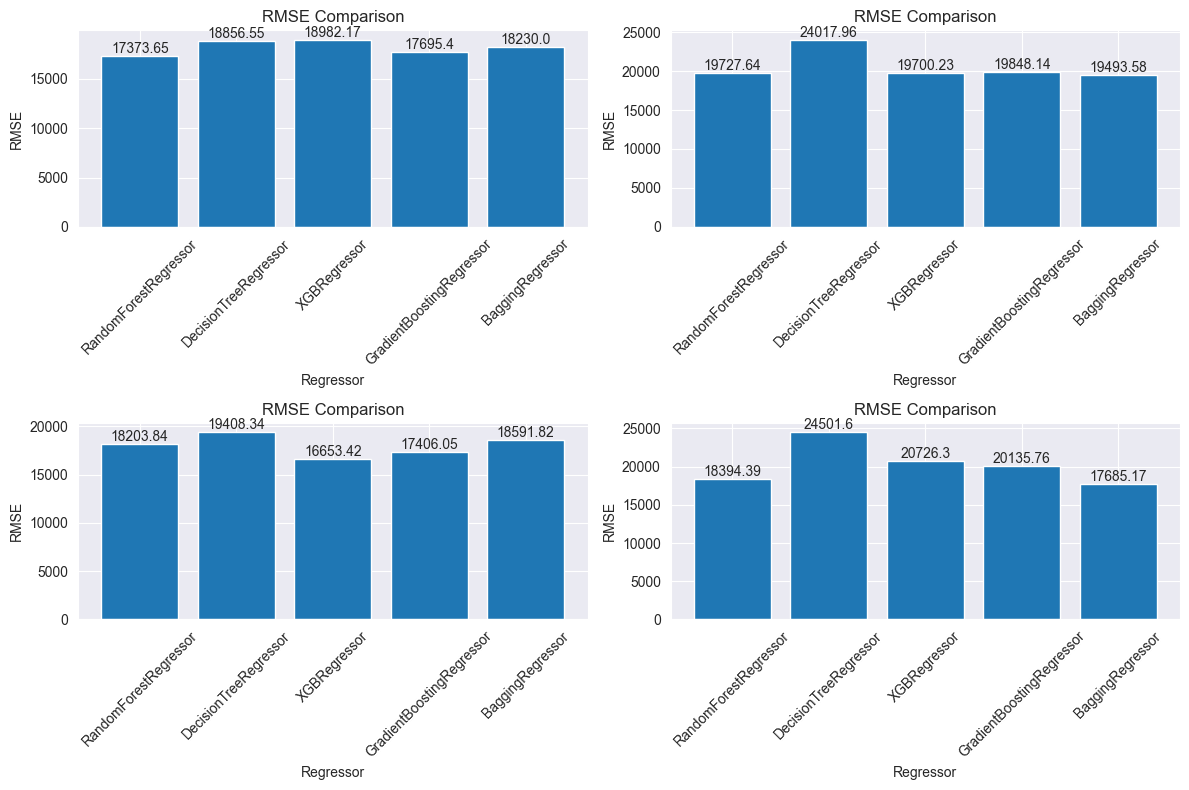

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến 4 file CSV
file_paths = ['scaled_small_car_used_data_ftloc_with_outliers_result.csv',
              'scaled_small_car_used_data_ftloc_without_outliers_result.csv',
              'scaled_small_car_used_data_with_outliers_result.csv',
              'scaled_small_car_used_data_without_outliers_result.csv']

# Tạo một figure và các axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Lặp qua từng file CSV và vẽ biểu đồ cho R2_Score
for i, ax in enumerate(axes.flat):
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(file_paths[i])

    # Lấy dữ liệu cột "R2_Score"
    r2_scores = data['root_mean_squared_error']

    # Lấy dữ liệu tương ứng của các regressor
    regressors = data['Regressor']

    # Vẽ biểu đồ
    bars = ax.bar(regressors, r2_scores)
    ax.set_xlabel('Regressor')
    ax.set_ylabel('RMSE')
    ax.set_title(f'RMSE Comparison')
    ax.tick_params(axis='x', rotation=45)

    # Hiển thị số trên mỗi cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

# Cân chỉnh layout của subplots
plt.tight_layout()

plt.savefig('RMSE_comparison_smallDS.png')

# Hiển thị biểu đồ
plt.show()

In [29]:
from PIL import Image

# Đường dẫn đến 4 ảnh
image_paths = ['BaggingRegressor small.png', 'RandomForestRegressor small.png', 'XGBRegressor small.png', 'GradientBoostingRegressor small.png','DecisionTreeRegressor small.png']

# Đọc và mở các ảnh
images = [Image.open(path) for path in image_paths]

# Kích thước của ảnh đầu tiên (được sử dụng làm kích thước cơ sở)
base_size = images[0].size

# Tạo ảnh mới có kích thước phù hợp để ghép 4 ảnh lại
new_image = Image.new('RGB', (2 * base_size[0], 3 * base_size[1]))

# Ghép ảnh
new_image.paste(images[0], (0, 0))
new_image.paste(images[1], (base_size[0], 0))
new_image.paste(images[2], (0, base_size[1]))
new_image.paste(images[3], (base_size[0], base_size[1]))
new_image.paste(images[4], (0, 2 * base_size[1]))

# Lưu ảnh ghép
new_image.save('combined_image_small.png')